In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np


In [2]:
#Pull data from csv files
df1 = pd.read_csv('New_BFH.csv')
df2 = pd.read_csv('New_CPB.csv')
df3 = pd.read_csv('New_UL.csv')


In [3]:
#Convert 'date_time' to datetime and set it as index
for df in [df1, df2, df3]:
    df['date_time'] = pd.to_datetime(df['date_time'])
    df.set_index('date_time', inplace=True)


C:\Users\micha\AppData\Local\Temp\ipykernel_66748\341466001.py:2: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['date_time'] = pd.to_datetime(df['date_time'])
C:\Users\micha\AppData\Local\Temp\ipykernel_66748\341466001.py:2: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['date_time'] = pd.to_datetime(df['date_time'])
C:\Users\micha\AppData\Local\Temp\ipykernel_66748\341466001.py:2: FutureWarning: In a future version of pandas, parsing date

In [4]:
#Group and aggregate data by year and take the mean of each year
df1_yearly = df1.groupby(df1.index.astype(str).str[:4])['Close'].last().groupby(lambda x: int(x) // 1 * 1).mean()
df2_yearly = df2.groupby(df2.index.astype(str).str[:4])['Close'].last().groupby(lambda x: int(x) // 1 * 1).mean()
df3_yearly = df3.groupby(df3.index.astype(str).str[:4])['Close'].last().groupby(lambda x: int(x) // 1 * 1).mean()


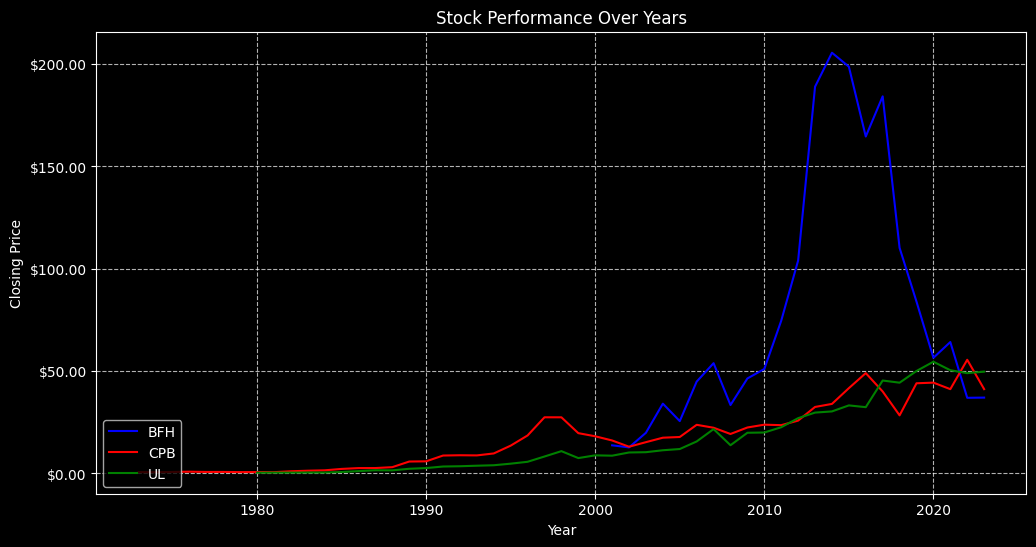

In [7]:
# Create the plots for the yearly closing prices
plt.figure(figsize=(12, 6))
plt.plot(df1_yearly.index, df1_yearly.values, label='BFH', color='blue')
plt.plot(df2_yearly.index, df2_yearly.values, label='CPB', color='red')
plt.plot(df3_yearly.index, df3_yearly.values, label='UL', color='green')
plt.xlabel('Year')
plt.ylabel('Closing Price')
plt.title('Stock Performance Over Years')
plt.legend(loc='lower left')
plt.grid(True, linestyle='--', alpha=0.7)
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: f'${x:,.2f}'))
# Show the plot in black
plt.style.use('dark_background')
fig.patch.set_facecolor('black')
ax.set_facecolor('black')
plt.show()



